# Goal
We will try to predict whether a name is a typical boys or girls name, using machine learning.

This workshop is a bit related to the demo James gave last week. In his demo he made the computer recognize whether he was holding an apple, a banana, or some other fruit. All done with just the click of a couple of buttons!

But a computer can't really see or understand what it sees like we humans do. In the end the thing a computer only really does is compute. It needs numbers! So how does the image of James holding a banana become just numbers a computer can "understand"?

Well, that's [quite complicated](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html) involving some complex math. So today we start with text rather than images, which is a bit easier and good way to introduce _feature extraction_. Start simple, right?

So our goals for today are:
1. Make the computer "understand" names by expressing names as numbers
2. Let the computer figure out what's a typical boys or girls name.
3. Ask the computer whether a name it has never seen is a tyical boys or girls name.

# Before we begin
We need some data to play with:
1. https://github.com/teropa/nlp/raw/master/resources/corpora/names/female.txt
2. https://github.com/teropa/nlp/raw/master/resources/corpora/names/male.txt

Download these files and put them in a place you can easily access from Python.

Let's read the names into Python. This code will open the file, read each of the names from the file, and remove any spaces or line breaks from the name so we just have the name, nothing more.

In [130]:
with open("male.txt") as file:
    male_names = [name.strip() for name in file]

with open("female.txt") as file:
    female_names = [name.strip() for name in file]

The names are sorted alphabetically. To make things a bit more interesting, shuffle them around *but don't mix them*.

In [131]:
import random
random.shuffle(male_names)
random.shuffle(female_names)

# Data exploration
Let's see what we've got here. Machine learning, or any data science, always begins with understanding what you are working with.

Let's start by printing some of those names, for example the first ten.

In [132]:
male_names[:10], female_names[:10]

(['Fernando',
  'Alastair',
  'Otis',
  'Hill',
  'Caldwell',
  'Ramon',
  'Baxter',
  'Barrie',
  'Willem',
  'Lay'],
 ['Ceil',
  'Aloysia',
  'Henka',
  'Marlane',
  'Alene',
  'Kelcie',
  'Mona',
  'Demetris',
  'Gilberte',
  'Ameline'])

_How many? Many!_ Let's check how much data we have.

In [133]:
len(male_names), len(female_names)

(2943, 5001)

Apparently many more female names than male names. Interesting…

How many names are given to both boys and girls?

In [134]:
both = [name for name in male_names if name in female_names]
len(both)

365

Okay, that should give us an idea of what we are working.

# Feature extraction
Back to our goal: make the computer understand names, or really, how to turn any name into a number.

In Machine Learning this step is called "feature extraction": you extract numbers (the "feature") from the thing you really have. In James his fruit-recognition example, that was an image. With our names, it is text.

_What you really do is describe the name to the computer in a language it understands: numbers!_

Important to remember about feature extraction for machine learning is that we need to be consistent: *If you give it the same name twice, you expect the same numbers each time.*

We can think of many ways of turning a name into a number:
- The number of letters is has
- How often the letter e occurs
- The number of vowels it has
- Whether it ends with a vowel (0 or 1 is also a number!)
- Whether it begins with a vowel
- How many letters are repeated

Let's just start with the first one, see what we get:

In [135]:
def extract_length(name):
    return len(name)

Okay, now to test this. The point of feature extraction is translating the names into a form of information that will help the computer to tell the difference between boys and girls names. We can check whether transforming the names into numbers using the length is helpful by looking at the numbers in a graph. So let's make a histogram: count all the lengths we see, and draw a bar for how often we see them. Green for girls, brown for boys. Easy to remember, it starts with the same letter.

The test function is very multi-purpose as we can re-use when we want to test other feature extractors.

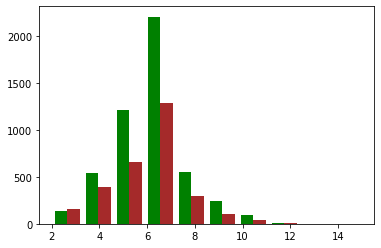

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

def test(feature_extractor):
    plt.hist([
        [feature_extractor(name) for name in female_names],
        [feature_extractor(name) for name in male_names]
    ], label=['girls', 'boys'], color=['green', 'brown'])

test(extract_length)

We see that there are many more girls names, if you add all their bars together you get a far longer bar than if you add all the boys bars. Let's fix that!

Instead of printing the number of times we count a number, let's print the proportion of names with that number. So 3 out of 6 and 4 out of 8 get bars of the same size. Luckily no extra math is necessary for that, matplotlib has a `density=True` option that does this for us. Let's see what the graph looks like if we add that.

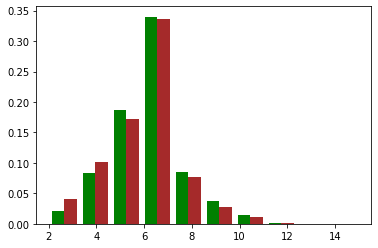

In [137]:
def test(feature_extractor):
    plt.hist([
        [feature_extractor(name) for name in female_names],
        [feature_extractor(name) for name in male_names]
    ], label=['girls', 'boys'], density=True, color=['green', 'brown'])

test(extract_length)

Well that doesn't work great, they are about the same. Both groups of names are on average 6 letters long.

Let's try our second attempt: how often does the letter 'e' occur?

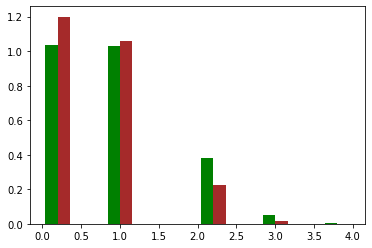

In [138]:
def extract_e(name):
    return name.count('e')

test(extract_e)

Again pretty similar. How about the number of vowels?

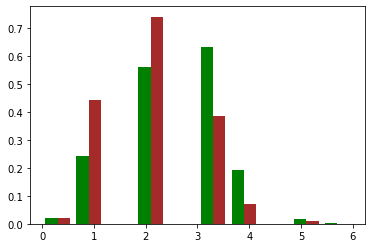

In [139]:
def extract_number_of_vowels(name):
    return sum(name.count(vowel) for vowel in 'aeiou')

test(extract_number_of_vowels)

Getting there! At least there is a difference. Let's try whether a name ends with a vowel?

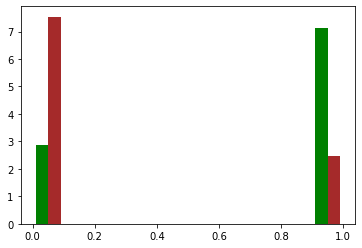

In [140]:
def extract_ends_with_vowel(name):
    return 1 if name[-1] in 'aeoiu' else 0

test(extract_ends_with_vowel)

Oh yes, that looks promising! What we have here is a way to turn a name into a number, and not just a number, but a number the computer can use to understand whether this is name might be a typical boys or girls name.

Let's try to make a function that uses our numerical version of a name to decide whether it's a girls or boys name.

If we look at the histogram above, we can say that if the number is less than 0.5, it's most likely a boys name. Or in Python:

In [141]:
def guess_gender(name):
    feature = extract_ends_with_vowel(name)
    if feature < 0.5:
        return 'boy'
    else:
        return 'girl'
    
guess_gender("Jelmer")

'boy'

Great. For my name, it works! We have lists of male and female names, how well does it work for those?

In [142]:
correct = sum(guess_gender(name) == 'boy' for name in male_names)
print(f'{correct} out of {len(male_names)} was correct')

correct = sum(guess_gender(name) == 'girl' for name in female_names)
print(f'{correct} out of {len(female_names)} was correct')

2219 out of 2943 was correct
3562 out of 5001 was correct


Ugh, not so great.

We might need to combine this test with other tests. But how? We can make `guess_gender(name)` more complex, add more if-statements, but what are the numbers that we need to compare? What combination of numbers decides whether a name is probably a boys or girls name?

# Making decisions
Here is another way to look at this problem. Say, you look back at that last histogram where boy names were mostly on the left and girl names mostly on the right. What we did for our `guess_gender(name)` function was drawing a line in the middle of that plot and decide that anything left of the line was boys, right girls.

That was in one dimension. One number. We can do that for two dimensions, two numbers as well! Let's draw where the names fall on a plot if we use two numbers:

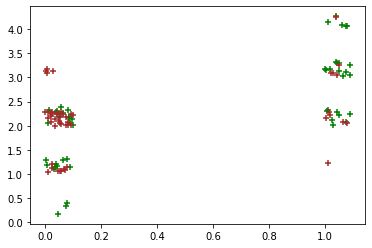

In [143]:
def test2(feature_extractor_1, feature_extractor_2):
    # Because the image will get crowded if I draw all names, I only
    # pick 100 names for each group at random.
    female_names_sample = random.sample(female_names, 50)
    male_names_sample = random.sample(male_names, 50)
    
    fig, ax = plt.subplots()
    ax.scatter(
        jitter([feature_extractor_1(name) for name in female_names_sample]),
        jitter([feature_extractor_2(name) for name in female_names_sample]),
        label='girls',
        color='green',
        marker='+'
    )
    ax.scatter(
        jitter([feature_extractor_1(name) for name in male_names_sample]),
        jitter([feature_extractor_2(name) for name in male_names_sample]),
        label='boys',
        color='brown',
        marker='+'
    )
    plt.show()

    
def jitter(numbers):
    # This function takes the numbers and nudges them around a bit
    # so they are not exactly in the same place. Otherwise we would
    # draw all plusses at exactly the same position and you wouldn't
    # see how many there were.
    stdev = .1 * (max(numbers) - min(numbers))
    return [number + random.random() * stdev for number in numbers]


test2(extract_ends_with_vowel, extract_number_of_vowels)

Okay, I hope you can sort-of draw a line through that plot where you can say that most plusses on one side are green, and on the other side are brown. If you can, you have just made the prototype for a better version of `guess_gender(name)`!

# I thought this was about machine learning!
But I'm not going to try. So far all we have done is express names into numbers and then try to guess the gender based on that number ourselves. We can draw that line, but a computer can also do that for us, right?

Well, yes, yes it can! Because the thing we've been doing here is exactly what a *support vector machine* (or SVM) does.

## Train & test sets
But before we let the computer decide our line, we need to think about how we are going to test whether the computer did any good.

We have our lists with names, we can give those to the SVM to learn where to draw the line. We can also use those lists to test whether it can correctly predict the gender. But we don't want to make it too easy for the SVM, we don't want it to just predict names it has already seen. 

That's why we will now first split our two lists in train and test sets.

In [144]:
train_male_names = male_names[0:-500] # Take all but the last 500 names
test_male_names = male_names[-500:] # Take only the last 500 names

train_female_names = female_names[0:-500]
test_female_names = female_names[-500:]

Next, we set up the SVM:

In [145]:
def test_model(clf, extract_features):
    # clf is short for classifier, because this SVM will classify the gender

    # Features will be our list with our numerical descriptions of names. Each row in the list
    # will be a second list of numbers. For now, let's stick to the two numbers we also used
    # in the 2d plot.
    features = []

    # For each row in features we will also have a label, telling whether that row is an
    # example of a boys or a girls name. Because we have to use numbers, let's say a 0 is
    # a boys name and a 1 is a girls name.
    LABEL_MALE = 0
    LABEL_FEMALE = 1
    labels = []

    for name in train_male_names:
        features.append(extract_features(name))
        labels.append(LABEL_MALE)
    
    for name in train_female_names:
        features.append(extract_features(name))
        labels.append(LABEL_FEMALE)
    
    # Now we have our features and labels, this will tell the SVM to fit the line.
    clf.fit(features, labels)
    
    # How well did it do?
    correct = sum(clf.predict([extract_features(name)]) == [LABEL_MALE] for name in test_male_names)
    print(f'{correct} out of {len(test_male_names)} male names was correct')

    correct = sum(clf.predict([extract_features(name)]) == [LABEL_FEMALE] for name in test_female_names)
    print(f'{correct} out of {len(test_female_names)} female names was correct')

And we need to make our 'feature extractor', our function that turns a name into a set of numbers:

In [146]:
from sklearn import svm

def extract_two_features(name):
    return [
        extract_number_of_vowels(name),
        extract_ends_with_vowel(name)
    ]

test_model(svm.SVC(), extract_two_features)

[363] out of 500 male names was correct
[353] out of 500 female names was correct


Okay, well, euh, it's something. Not entirely great yet. Maybe we need more numbers!

Wait, can you just do that? Yes! First we were drawing a line in 1D, then 2D, and we can go to 3D, 4D, *Whatever*D!

In [147]:
def extract_features(name):
    return [
        extract_number_of_vowels(name),
        extract_ends_with_vowel(name),
        extract_e(name),
        extract_length(name),
    ]

test_model(svm.SVC(), extract_features)

[365] out of 500 male names was correct
[346] out of 500 female names was correct


Still not really good. Can you improve it?

In [148]:
import string

def extract_features(name):
    descriptor = []
    for letter in string.ascii_lowercase: # for 'a' to 'z'
        descriptor.append(name.lower().count(letter))
    return descriptor

test_model(svm.SVC(), extract_features)

[245] out of 500 male names was correct
[443] out of 500 female names was correct


# About that data
Maybe an SVM is not the best way to make a decision on the typical gender of a name. In our exploration we already concluded that there are quite a few names that are both typically male and female names. You can't draw a boundary line through those points!

Now maybe, you say, there are many people that have such a name, but most of them are male. True, I say, but given the data we have, we don't know that. So we can't learn that to our computer…

Maybe that's unfair, let's remove those shared names from our dataset. (And because I'm not in the mood for complex filtering for-loop, we'll use a set!)

In [154]:
# "A ^ B" means intersection, i.e. keep everything that is in A and also in B at the same time
names_in_common = set(male_names) ^ set(female_names)

# "A - B" with sets means subset, so keep everything in A that is not in B
only_male_names = list(set(male_names) - names_in_common)
only_female_names = list(set(female_names) - names_in_common)

# Split the names into two sets, one for training and one for testing
train_male_names = male_names[0:-500] # Take all but the last 500 names
test_male_names = male_names[-500:] # Take only the last 500 names

train_female_names = female_names[0:-500]
test_female_names = female_names[-500:]

# To check whether we still have enough names left
len(train_male_names), len(train_female_names)

(2443, 4501)

In [150]:
test_model(svm.SVC(), extract_features)

[245] out of 500 male names was correct
[443] out of 500 female names was correct


# About the algorithm
As I said, maybe an SVM with its single line isn't flexible enough. When we began we began by writing if-rules ourselves. Maybe we can do something like that, but let the computer decide on those rules by itself?

Turns out, not a novel idea. That's a decision tree classifier! Let's try it.

In [151]:
from sklearn import tree
test_model(tree.DecisionTreeClassifier(), extract_features)

[283] out of 500 male names was correct
[359] out of 500 female names was correct


Not much better. How about using probability theory? Given each of the number, what's the chance the gender is male or female?

In [152]:
from sklearn import naive_bayes
test_model(naive_bayes.GaussianNB(), extract_features)

[186] out of 500 male names was correct
[412] out of 500 female names was correct


# About the representation
Another thing that might be difficult for the computer is that our numbers are in an odd range. What if we normalize them, so they are always somewhere between 0 and 1?

In [153]:
# First, make a list of numbers that is as long as our numerical description of a name
ranges = [0] * len(extract_features(''))

# Then, determine the maximum each of the numbers can be
for name in male_names + female_names:
    for n, number in enumerate(extract_features(name)):
        ranges[n] = max(number, ranges[n])

# Now then, we can make a new extract_features function that uses the original one,
# but also uses the maximum numbers we found to make all numbers fall between 0 and 1.
def extract_features_normalized(name):
    # Use our original name-to-numbers function
    numbers = extract_features(name)
    
    # Normalize them, bringing them from 0-N into 0-1 range
    for n, number in enumerate(numbers):
        numbers[n] = number / ranges[n]
    
    return numbers

# Let's test it!
test_model(svm.SVC(), extract_features_normalized)

[247] out of 500 male names was correct
[443] out of 500 female names was correct


# Credits
This workshop is based on [chapter 6 "Learning to Classify Text" of the NLTK book](http://www.nltk.org/book/ch06.html). You should definitely take a look at it if you want to do more with this.